In [1]:
import pandas as pd

In [2]:
iris_data = pd.read_csv('iris.csv')

In [3]:
iris_data.head()

,SL,SW,PL,PW,CLASS
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SL      150 non-null    float64
 1   SW      150 non-null    float64
 2   PL      150 non-null    float64
 3   PW      150 non-null    float64
 4   CLASS   150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris_data['CLASS'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: CLASS, dtype: int64

In [6]:
iris_data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Ploting Histogram

In [7]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'SL'}>,
        <AxesSubplot:title={'center':'SW'}>],
       [<AxesSubplot:title={'center':'PL'}>,
        <AxesSubplot:title={'center':'PW'}>]], dtype=object)

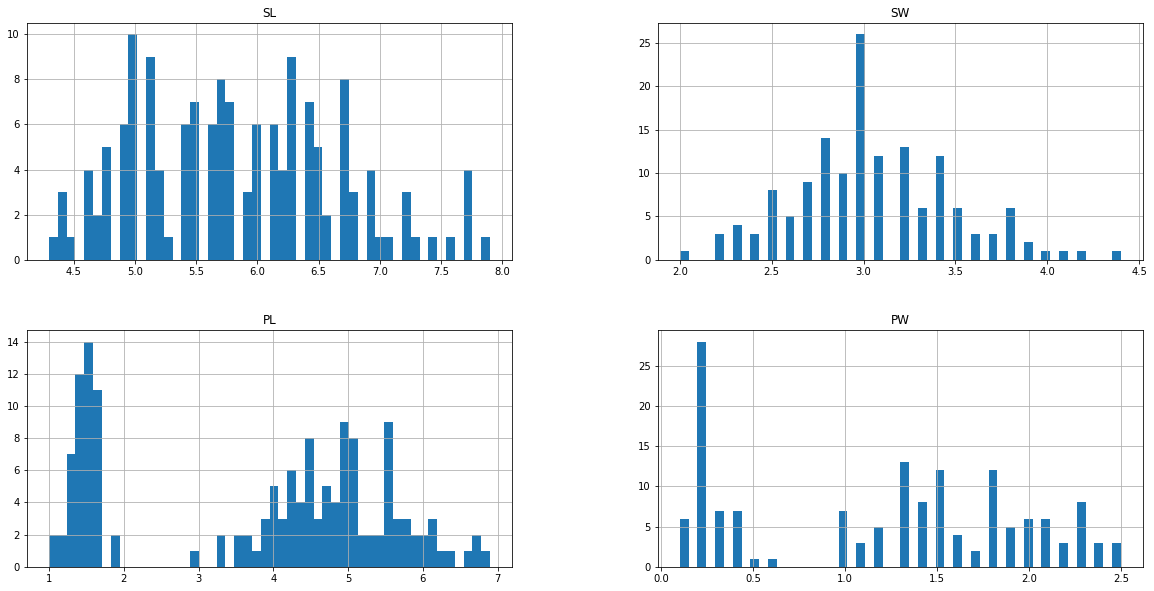

In [8]:
import matplotlib as plt
iris_data.hist(bins=50,figsize=(20,10))

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(iris_data, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")
y = train_set['CLASS']
y_train = y[0:120]

Rows in train set: 120
Rows in test set: 30



In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(iris_data, iris_data["CLASS"]):
    strat_train_set = iris_data.loc[train_index]
    strat_test_set = iris_data.loc[test_index]

[  8 106  76   9  89 146  94 133 135 117 105  78  60  67  92  29  19 108
 137  31  72  46 131  25  81 103 111  26 121  40  21  71  91  15 139 148
  79  59 144  70   6  50  16 130   1  17 101  35  41  12  45  64 100  55
   0 149  99 136  47 142  36  53 113  24  83  90 122  66  54 115  39  23
   4 119  82 129  80 145 123  85  34 114  68  43 120  32 109  98  86  30
  97 110  44  13 124 118 112  87 126   5 143  96 125 102  48  74  73  95
  88  65  27 128  62  61  11  37   2  33  52   3]


In [11]:
iris_data = strat_train_set.copy()

In [12]:
# corr_matrix = iris_data.corr()
# corr_matrix['CLASS'].sort_values(ascending=False)
iris_data.columns
# corr_matrix = iris_data.corr()
# corr_matrix['SW'].sort_values(ascending=False)

Index(['SL', 'SW', 'PL', 'PW', 'CLASS'], dtype='object')

In [13]:
# from pandas.plotting import scatter_matrix
# attributes = ["SL", "SW", "PL", "PW", "CLASS"]
# scatter_matrix(iris_data[attributes], figsize = (12,8))
iris_data = strat_train_set.drop("CLASS", axis=1)

In [14]:
# iris_data.plot(kind="scatter", x="PL", y="CLASS", alpha=0.8)
strat_train_set['CLASS'].unique() 

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], dtype=object)

In [15]:
# from sklearn import preprocessing 
# label_encoder = preprocessing.LabelEncoder()
# strat_train_set['CLASS']= label_encoder.fit_transform(strat_train_set['CLASS']) 
# strat_train_set['CLASS'].unique()

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
my_pipeline = Pipeline([
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy="constant")),
])

iris_labels = strat_train_set["CLASS"].copy()
iris_num_tr = my_pipeline.fit_transform(iris_data)

In [17]:
from sklearn.linear_model import LinearRegression, LogisticRegression
model = LogisticRegression()
model.fit(iris_num_tr, iris_labels)

LogisticRegression()

In [18]:
iris_num_tr = my_pipeline.fit_transform(iris_data)

In [19]:
iris_num_tr.shape

(120, 4)

In [20]:
some_data = iris_data.iloc[:6]

In [21]:
some_labels = iris_labels.iloc[:6]

In [22]:
prepared_data = my_pipeline.transform(some_data)
# iris_data.columns

In [23]:
import numpy as np
fea = np.array([[6.3,3.3,6.0,2.5]])
model.predict(fea)

array(['Iris-virginica'], dtype=object)

In [24]:
# if int(predict) < 2:
#     print('Iris-setosa')

# elif int(predict) < 3:
#     print('Iris-versicolor')

# elif int(predict) < 4:
#     print('Iris-virginica')
# print(predict)

In [25]:
from sklearn.metrics import mean_squared_error
import numpy as np
iris_predictions = model.predict(iris_num_tr)
mse = mean_squared_error(iris_labels, iris_predictions)
rmse = np.sqrt(mse)

ValueError: could not convert string to float: 'Iris-setosa'

In [ ]:
percentage = 100.0 - rmse
print(per)

In [ ]:
# from joblib import dump, load
# dump(model, 'iris.joblib') 